In [36]:
import os
import cv2
import json
import shutil
import random
import numpy as np
import glob
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
from src.create_annotations import *
from shapely.geometry import Polygon, MultiPolygon
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [37]:
# Function for skew correction
def skew_correction(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    coords = np.column_stack(np.where(binary > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

In [38]:
# Function for image scaling
def image_scaling(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

In [39]:
# Function for noise removal
def noise_removal(image):
    denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return denoised

In [40]:
# Function for thinning and skeletonization
def thinning_skeletonization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    size = np.size(binary)
    skel = np.zeros(binary.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False
    while not done:
        eroded = cv2.erode(binary, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary, temp)
        skel = cv2.bitwise_or(skel, temp)
        binary = eroded.copy()
        zeros = size - cv2.countNonZero(binary)
        if zeros == size:
            done = True
    return skel

In [41]:
# Function for gray scale conversion
def gray_scale(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:  # If the image is already in single-channel format
        gray = image
    return gray

In [47]:
# Function for adaptive thresholding
def adaptive_thresholding(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:  # If the image is already in single-channel format
        gray = image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

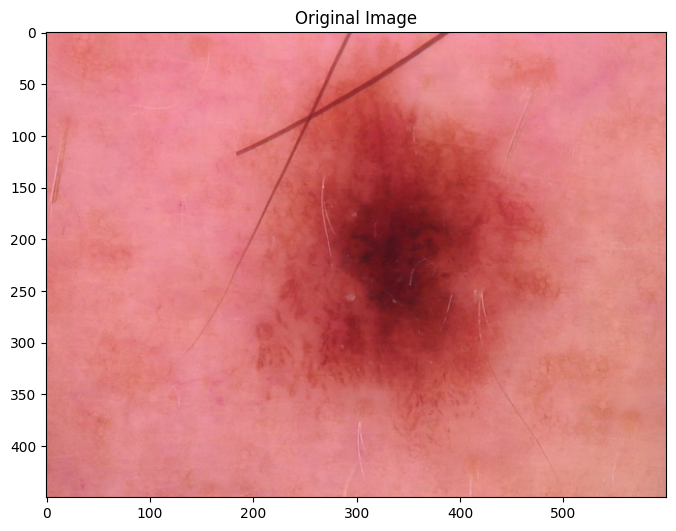

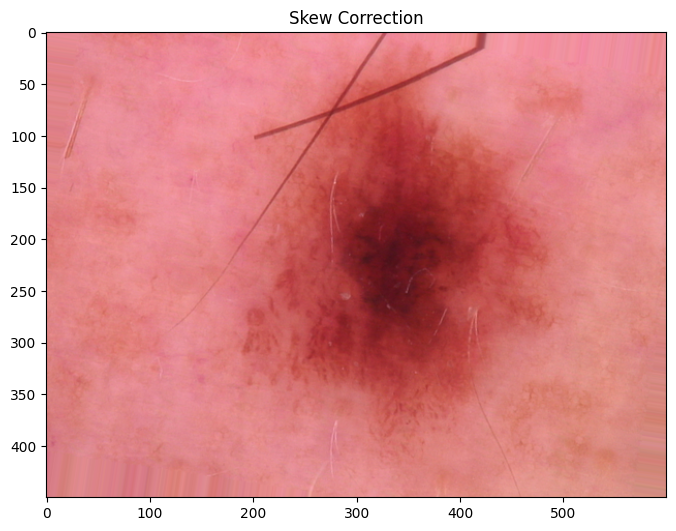

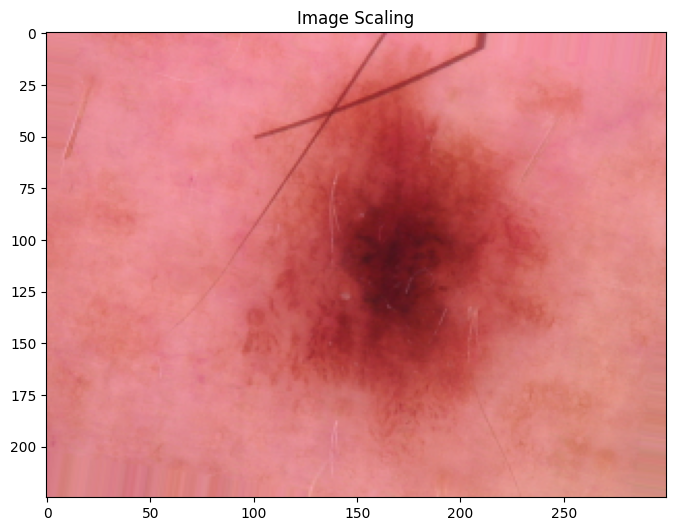

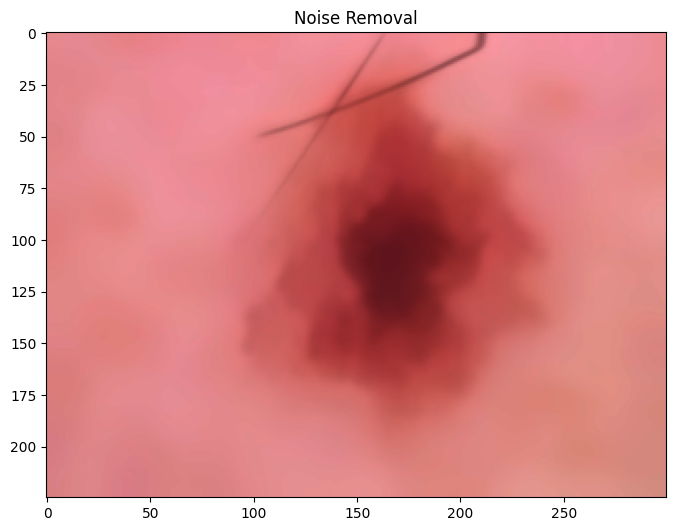

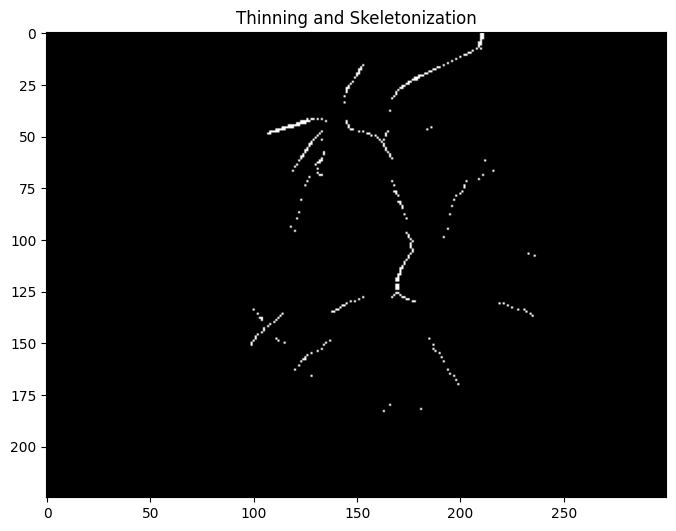

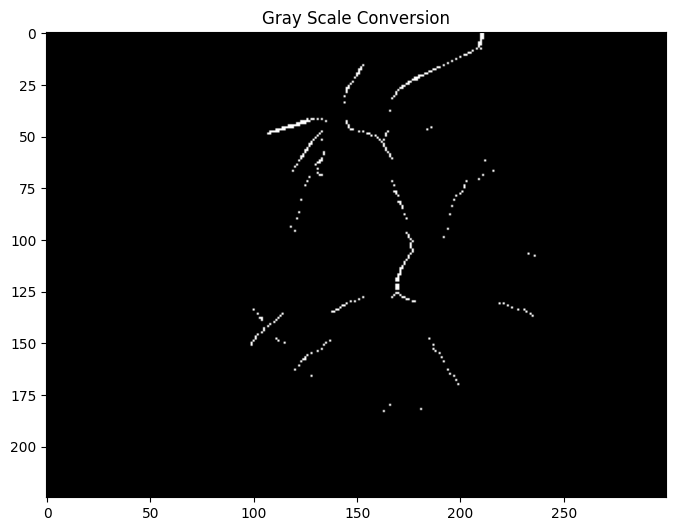

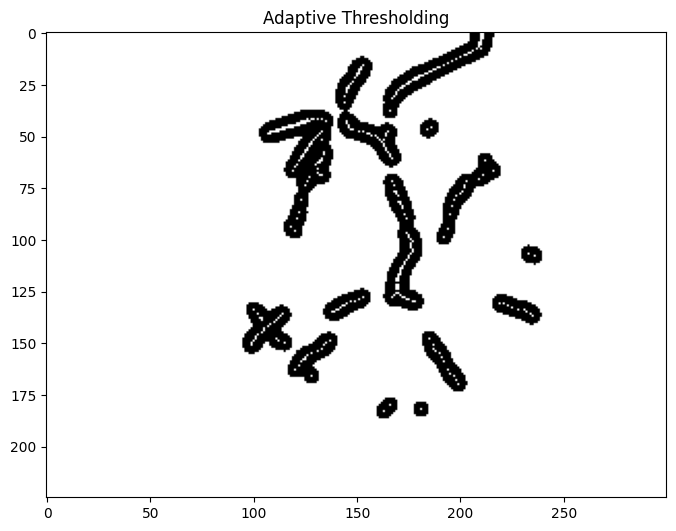

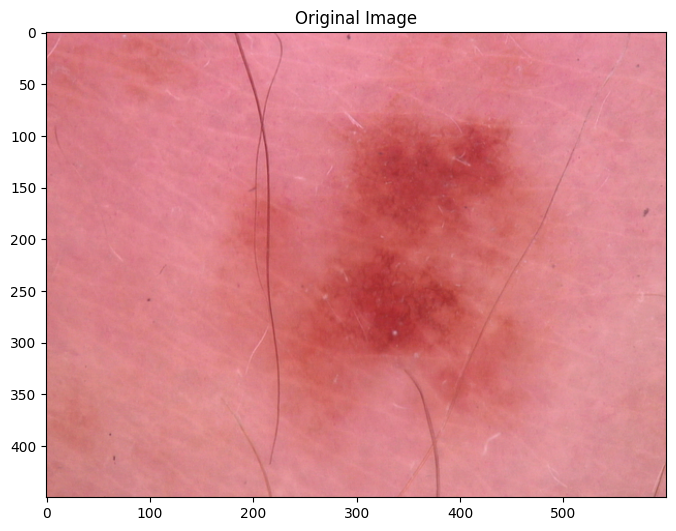

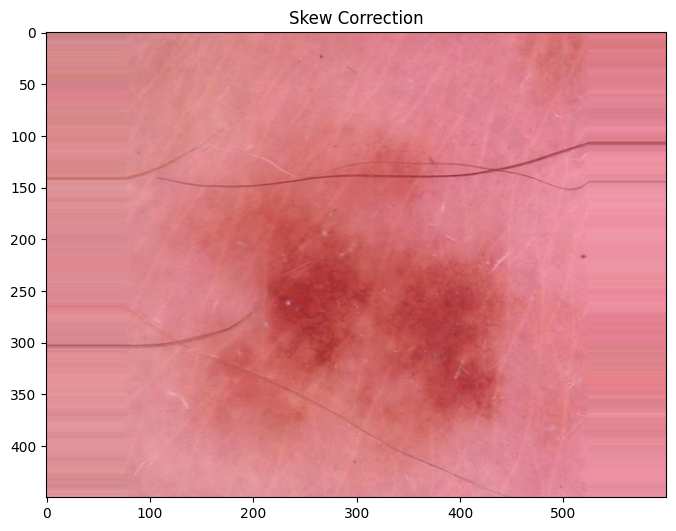

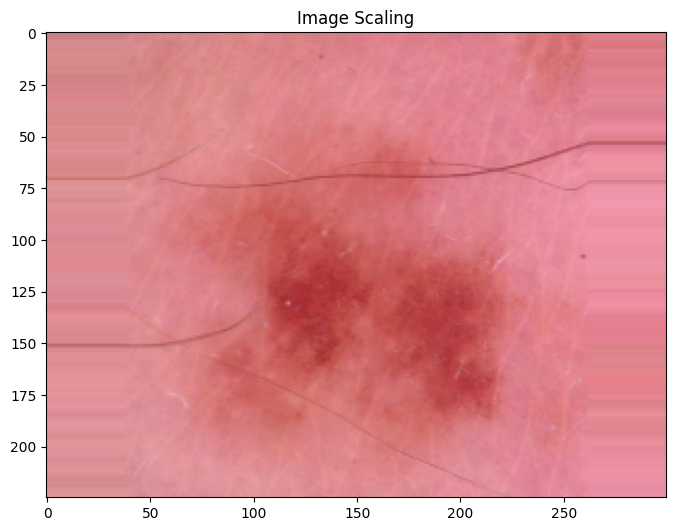

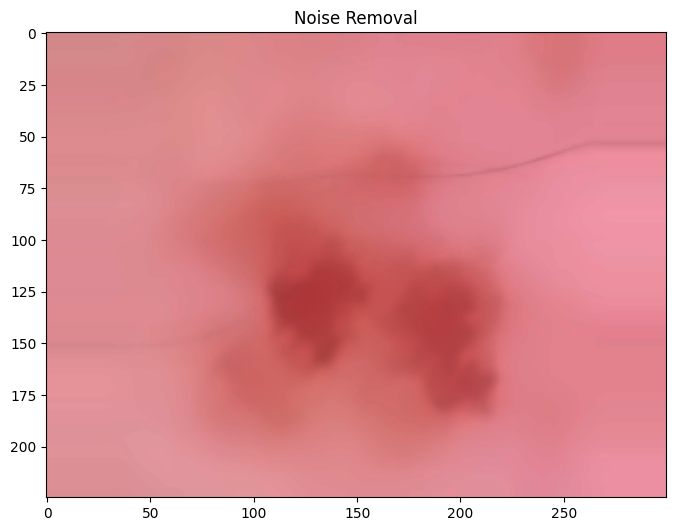

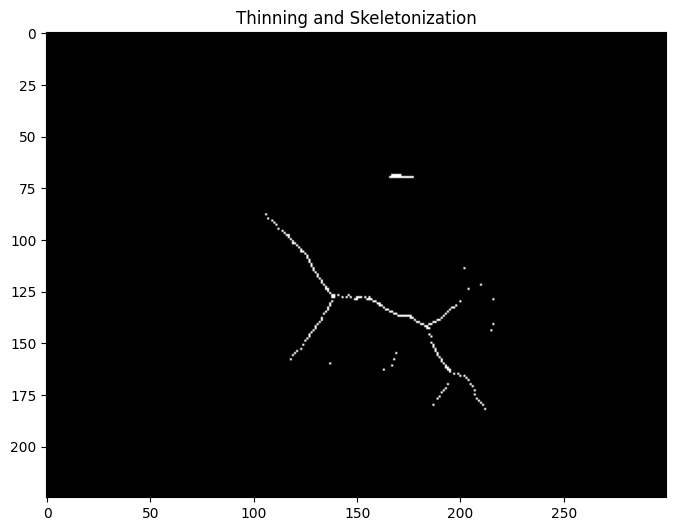

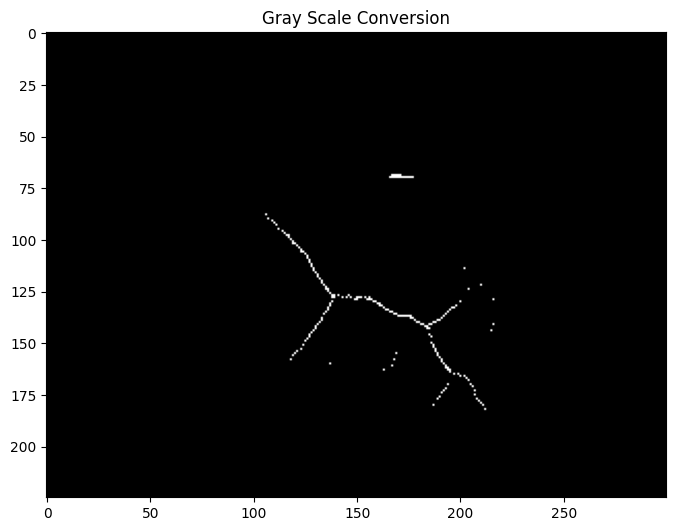

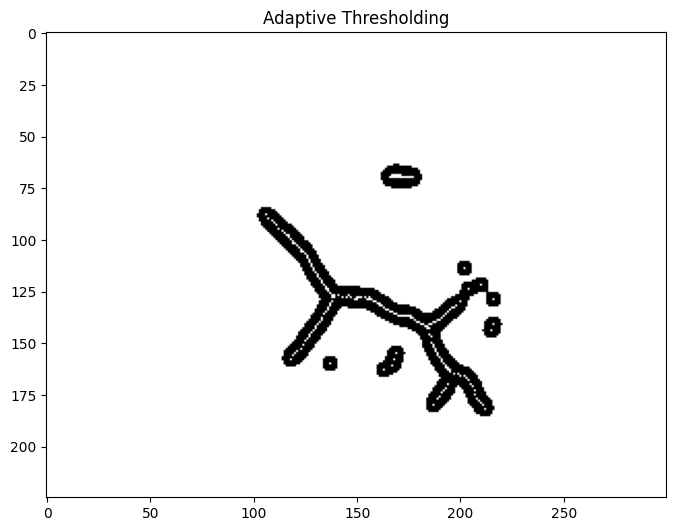

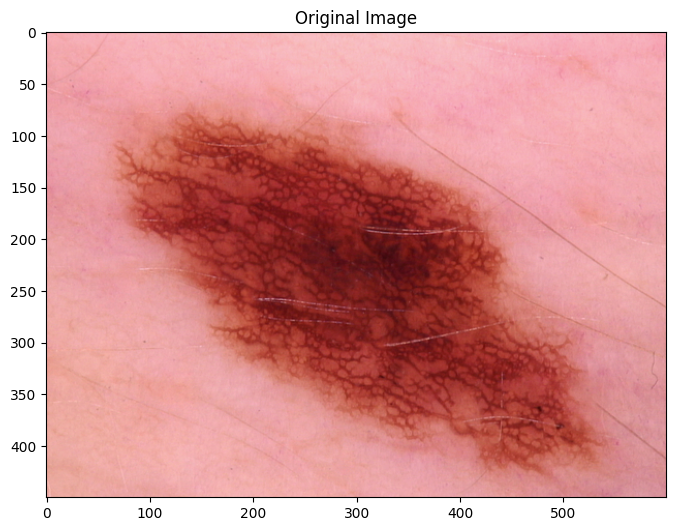

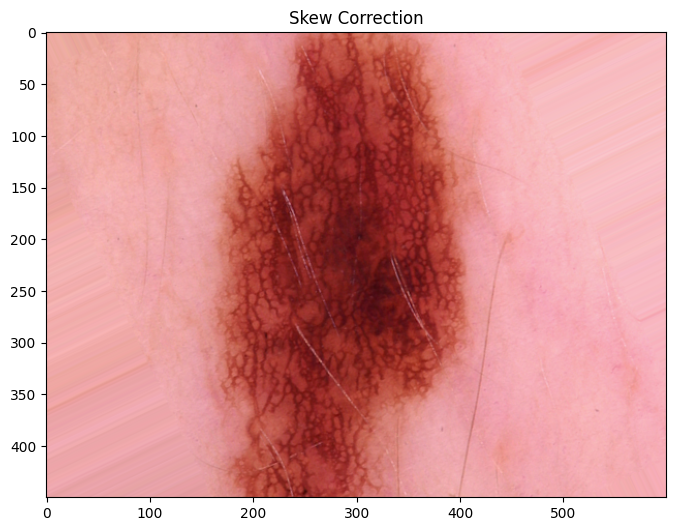

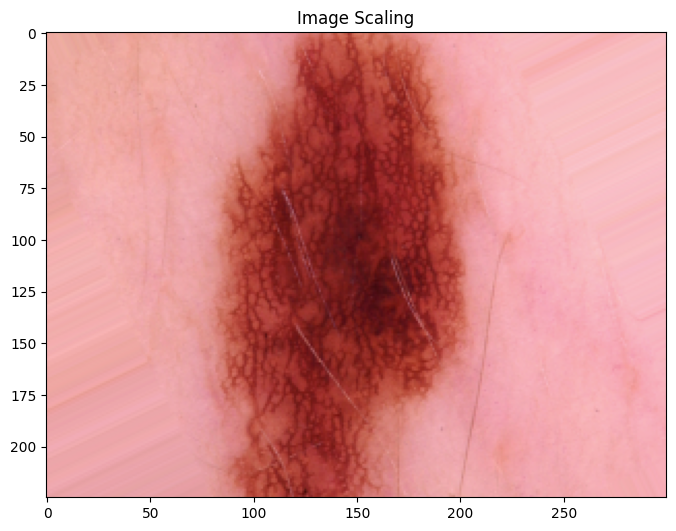

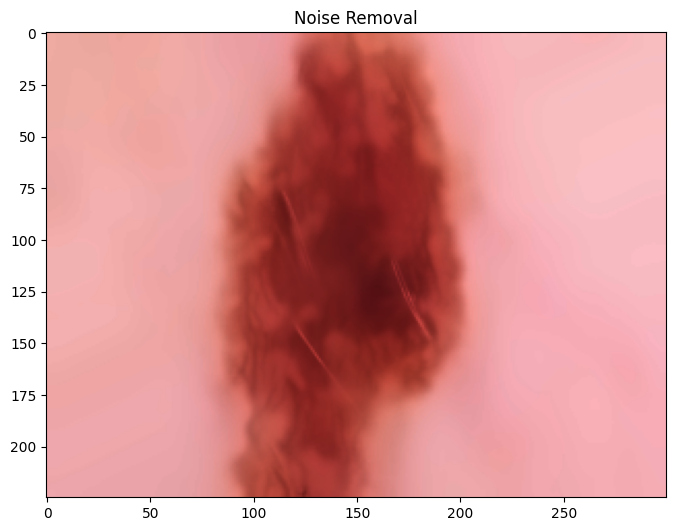

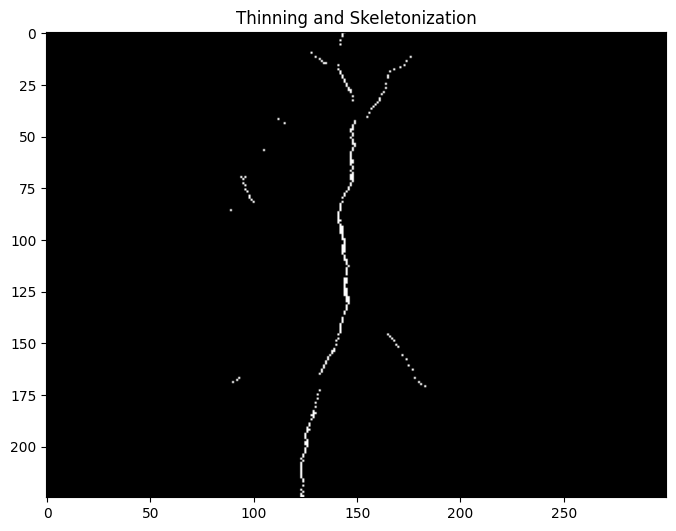

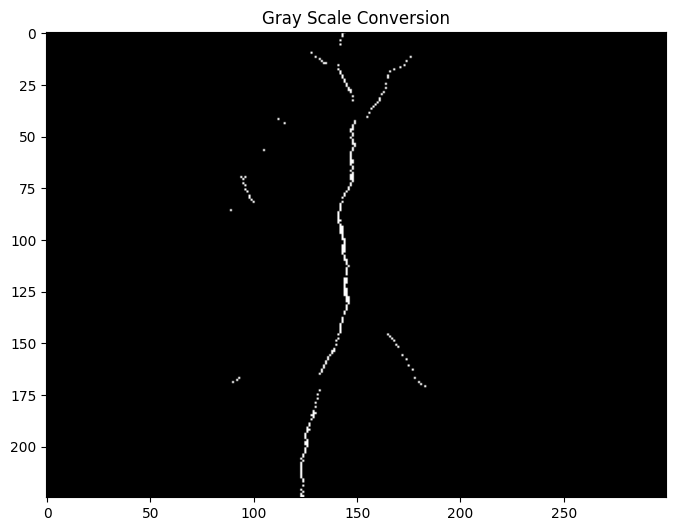

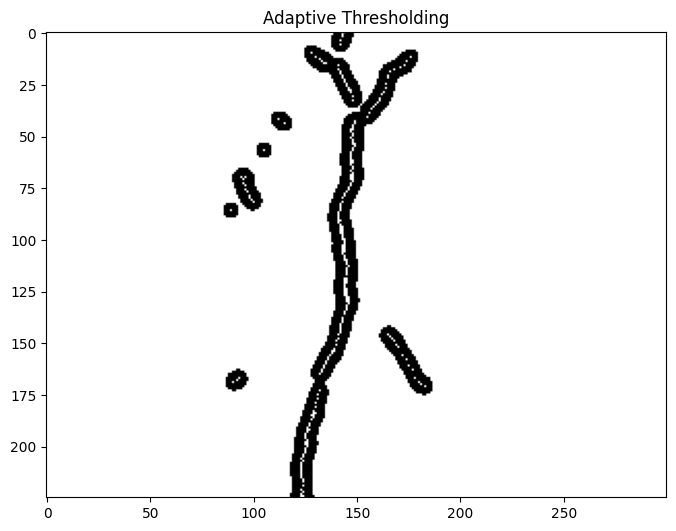

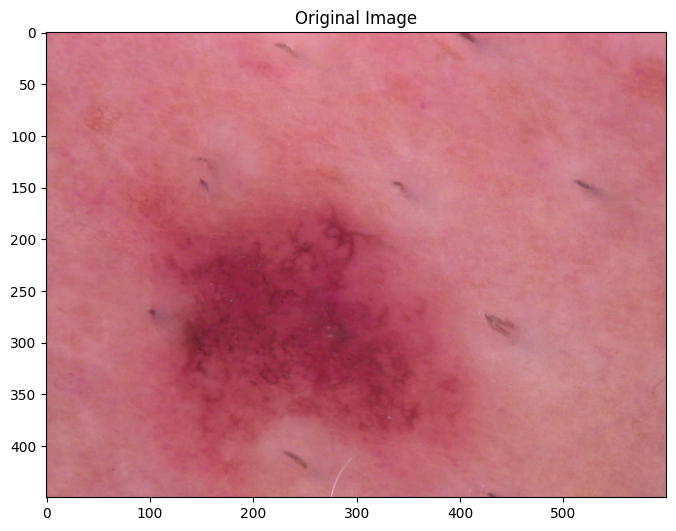

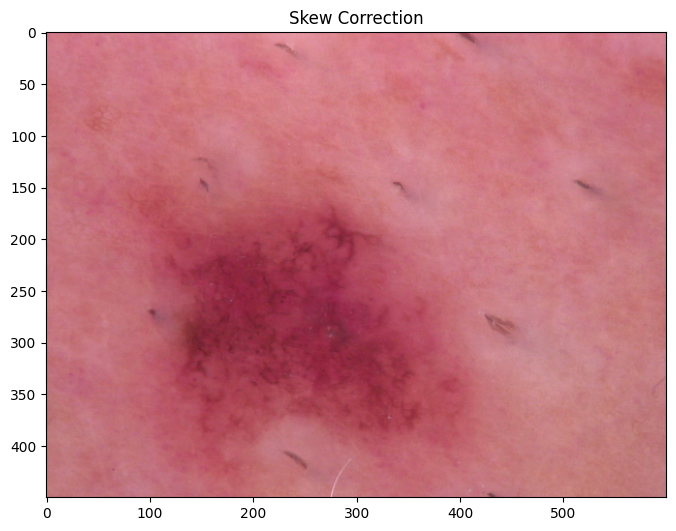

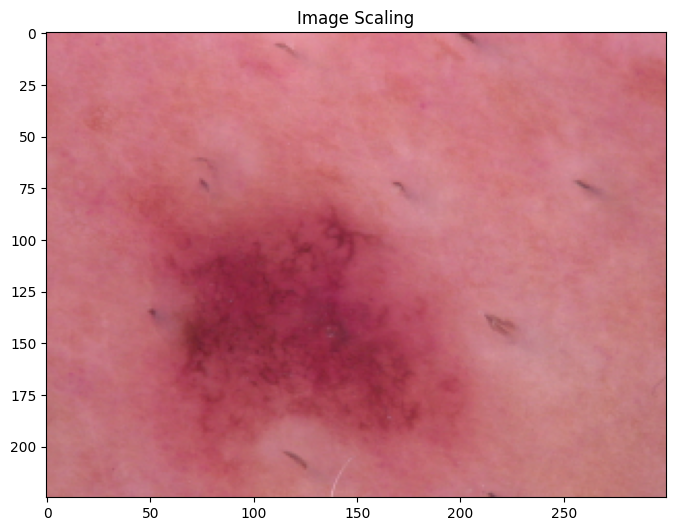

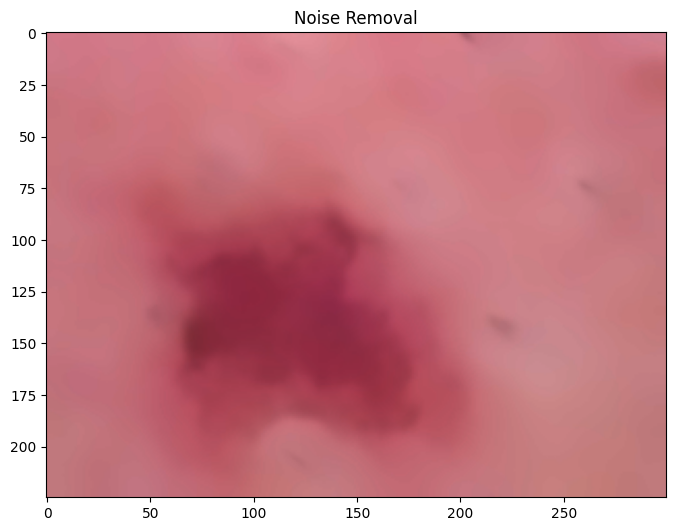

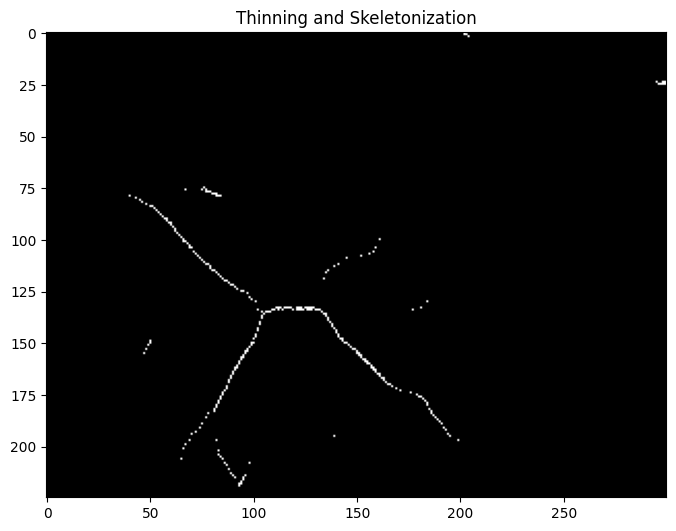

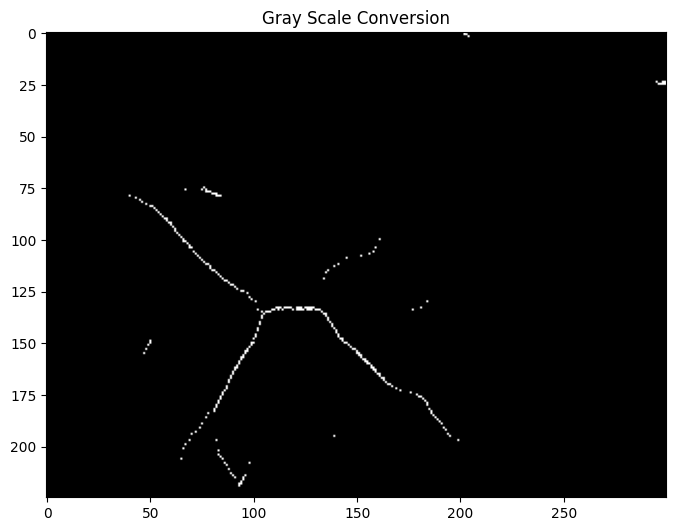

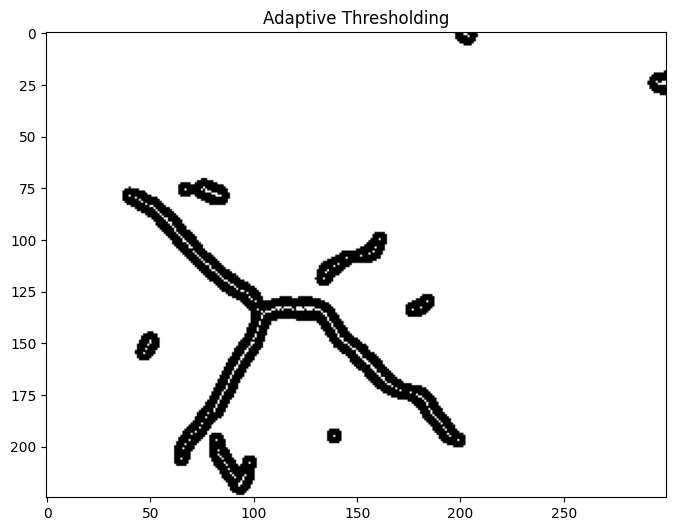

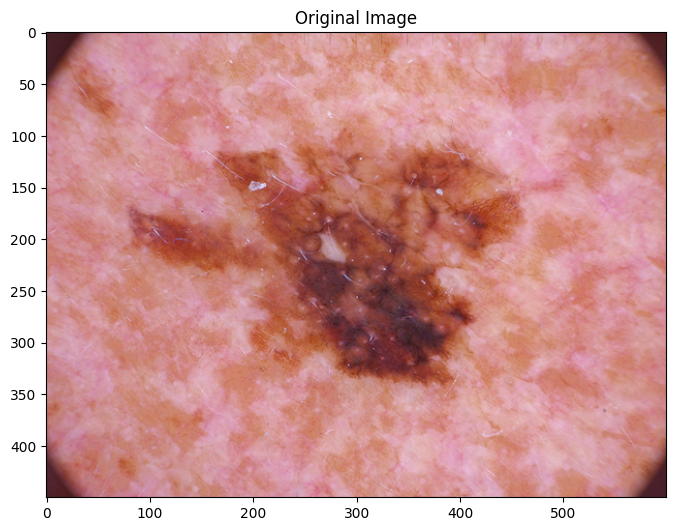

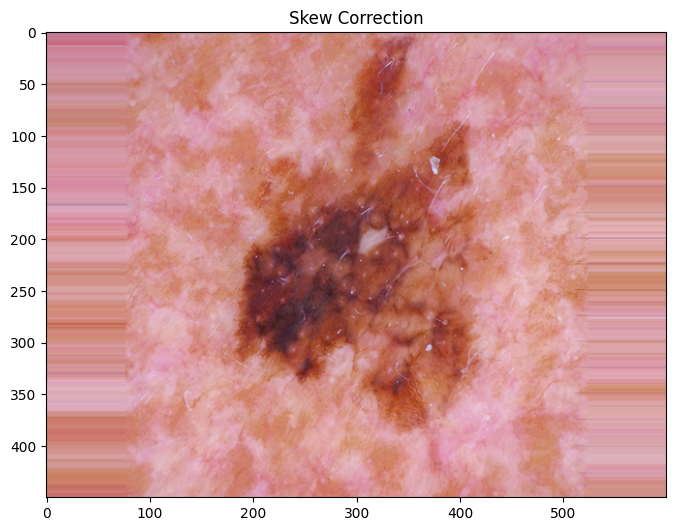

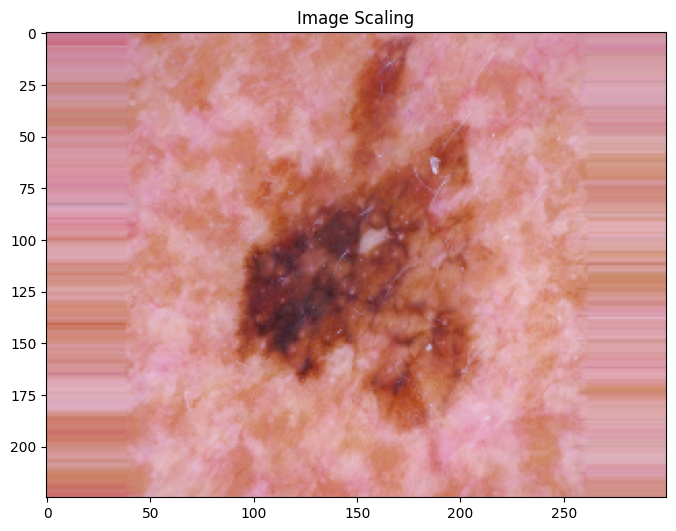

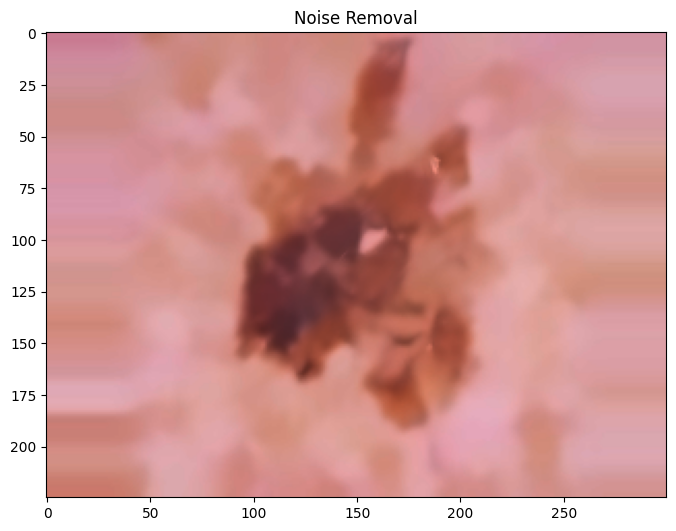

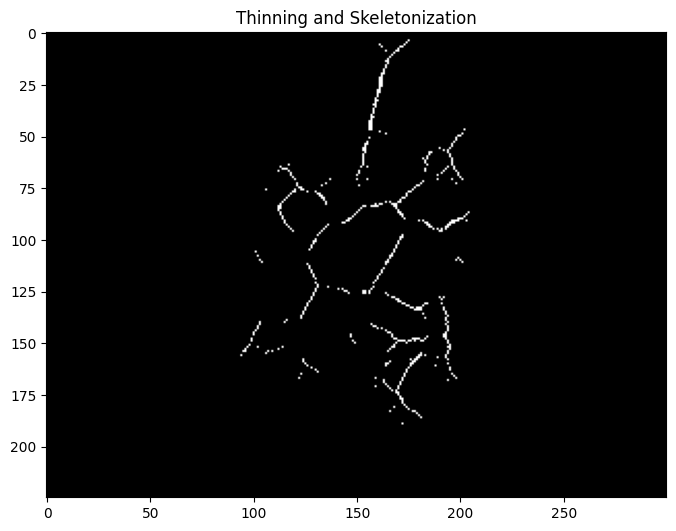

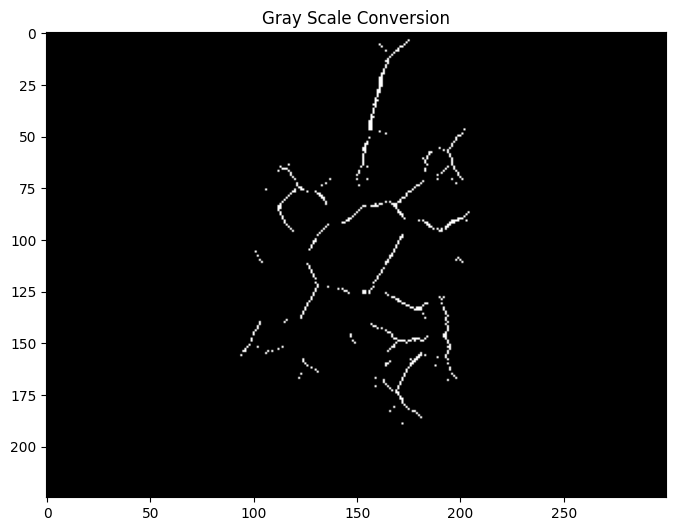

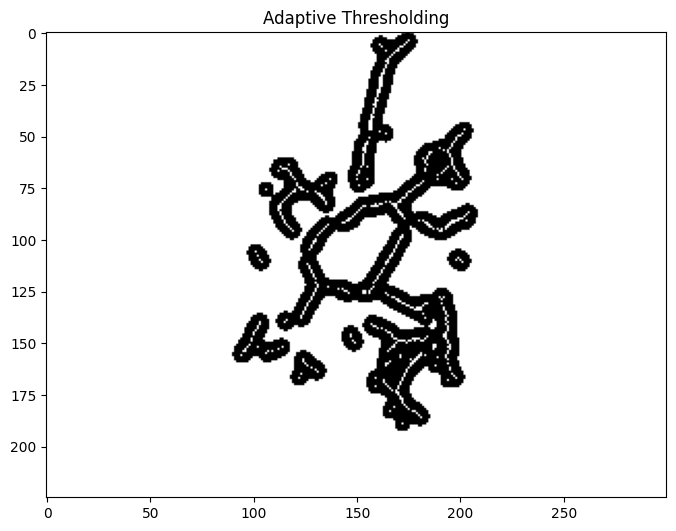

Image processing completed.


In [49]:
# Specify the path to your dataset
input_folder_path = "dataset/input_images"
output_folder_path = "dataset/processed_images"

# Create output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Process each image in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image
        image_path = os.path.join(input_folder_path, filename)
        original_image = cv2.imread(image_path)

        # Display the original image
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.show()

        # Perform image processing steps
        processed_image = skew_correction(original_image)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Skew Correction')
        plt.show()

        processed_image = image_scaling(processed_image, scale_percent=50)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Image Scaling')
        plt.show()

        processed_image = noise_removal(processed_image)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Noise Removal')
        plt.show()

        processed_image = thinning_skeletonization(processed_image)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Thinning and Skeletonization')
        plt.show()

        processed_image = gray_scale(processed_image)
        plt.figure(figsize=(8, 8))
        plt.imshow(processed_image, cmap='gray')
        plt.title('Gray Scale Conversion')
        plt.show()

        processed_image = adaptive_thresholding(processed_image)
        plt.figure(figsize=(8, 8))
        plt.imshow(processed_image, cmap='gray')
        plt.title('Adaptive Thresholding')
        plt.show()

        # Save the processed image
        output_path = os.path.join(output_folder_path, f"processed_{filename}")
        cv2.imwrite(output_path, processed_image)

print("Image processing completed.")
# Specify the path to your dataset
# input_folder_path = "dataset/input_images"
# output_folder_path = "dataset/processed_images"

# # Create output folder if it doesn't exist
# if not os.path.exists(output_folder_path):
#     os.makedirs(output_folder_path)

# # Process each image in the input folder
# for filename in os.listdir(input_folder_path):
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Read the image
#         image_path = os.path.join(input_folder_path, filename)
#         original_image = cv2.imread(image_path)

#         # Perform image processing steps
#         processed_image = skew_correction(original_image)
#         processed_image = image_scaling(processed_image, scale_percent=50)
#         processed_image = noise_removal(processed_image)
#         processed_image = thinning_skeletonization(processed_image)
#         processed_image = gray_scale(processed_image)
#         processed_image = adaptive_thresholding(processed_image)

#         # Save the processed image
#         output_path = os.path.join(output_folder_path, f"processed_{filename}")
#         cv2.imwrite(output_path, processed_image)

# print("Image processing completed.")